In [111]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('always')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [53]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Extract Train and Test Data
* Specify the location to the dataset and import them

In [54]:
train = pd.read_csv(r'C:\Users\Chinmay\ML repos\Titanic\train.csv' ) # Train
test = pd.read_csv(r'C:\Users\Chinmay\ML repos\Titanic\test.csv' ) # Test
test_df = test.copy()

In [55]:
# Explore Train Data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Features
* PassengerId : The id given to each traveller on the boat.
* Pclass : The Passenger class. It has three possible values: 1,2,3 (first, second and third class).
* Name : The Name of the passeger.
* Sex : The Gender of the Passenger.
* Age : The Age of the Passenger.
* SibSp : The number of siblings and spouses traveling with the passenger.
* Parch : number of parents and children traveling with the passenger.
* Ticket : The ticket number of the Passenger.
* Fare : The ticket Fare of the passenger
* Cabin : The cabin number.
* Embarked : This describe three areas of the Titanic from which the people embark. Three possible values S,C,Q (Southampton,     Cherbourg, Queenstown).


*Qualitative Features (Categorical) : PassengerId , Pclass , Survived , Sex , Ticket , Cabin , Embarked.*

*Quantitative Features (Numerical) : SibSp , Parch , Age , Fare.*

### Survival is the Target Variable.

In [56]:
train.shape

(891, 12)

So, We have 891 rows and 12 columns

In [57]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Let's look at all the columns and examine Null Values**

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### We see that Age, Cabin and Embarked have Null values.

In [59]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Let's look at Test data

In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
# Test data doesn't have 'Survived' column and that's what we have to predict

In [62]:
# Let's look at the figures and Understand the Survival Ratio
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [63]:
# Look at the percentage
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### So, out of 891 examples only 342 (38%) survived and rest all died.

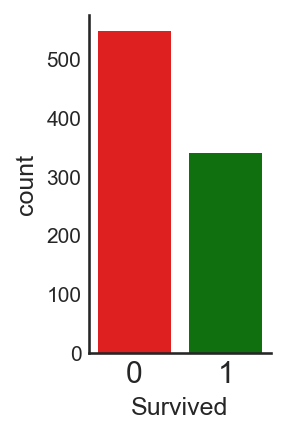

In [64]:
sns.factorplot(x='Survived' , kind='count' , data=train , palette=['r','g'] , size=3 , aspect=.6)

# Examine Features :

## Pclass ->
Let's examine Survival based on Pclass.

In [65]:
pd.crosstab(train.Pclass , train.Survived , margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [66]:
train[['Pclass' , 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


So, there is *62.96%* Survival chance for **1st Class**. This clearly shows us that **First Class People were given priority first**.

In [67]:
# Let's Plot graph to better Visualize

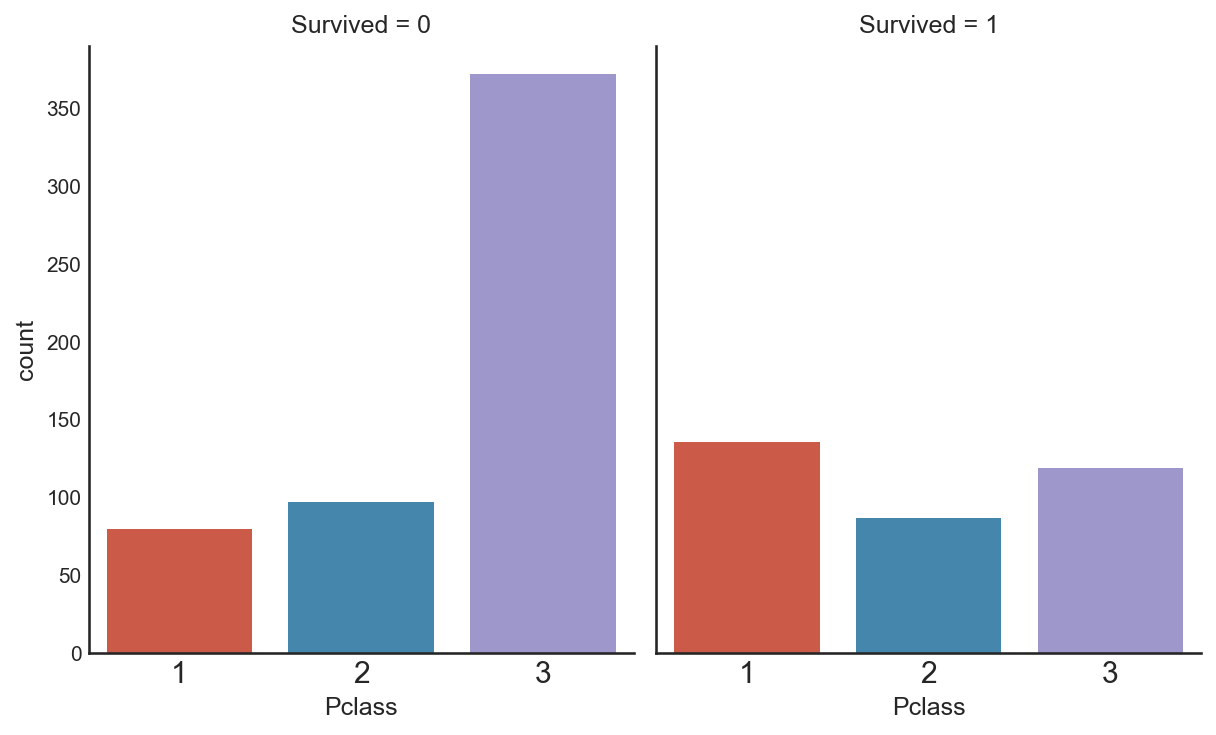

In [68]:
sns.factorplot(x='Pclass' , data=train , col='Survived' , kind='count' , size=5 , aspect=.8)

**We can clearly see that 3rd Class People were alloted the least priority and they died in large numbers.**

## Sex ->
Let's examine Survival based on Gender

In [69]:
pd.crosstab(train.Sex , train.Survived , margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [70]:
# To view percentage, add normalize='index'
pd.crosstab(train.Sex , train.Survived , normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


It seems that **Female Survival Probability (74%)** is almost *thrice* that of **Men (18%)** . Or we can say Females were more likely to Survive.

In [71]:
# Let's plot some graphs to visualize

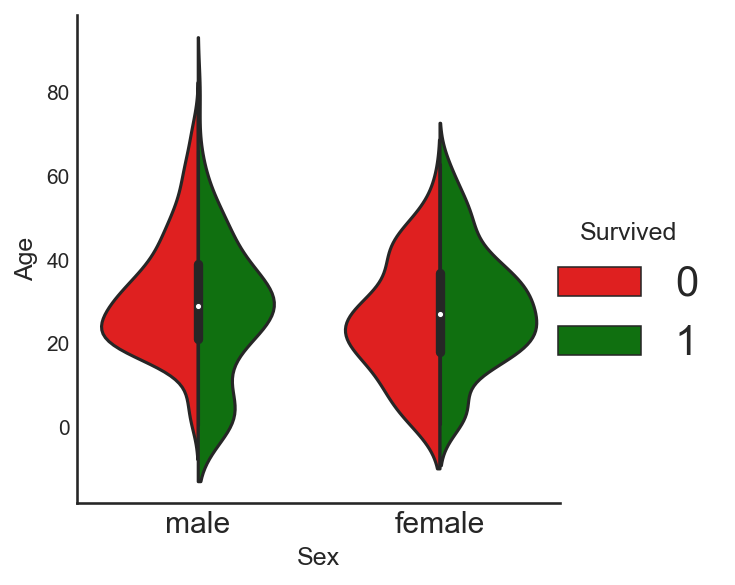

In [72]:
sns.factorplot(x='Sex' , y='Age' , data=train , hue='Survived' , kind='violin' , palette=['r','g'] , split=True)

We can see that Males have **Surviving Density** less than Females (Bulged) . And majority of those who survived belonged to the category of Age limit 20-30 . Same is true for the Death Scenario.

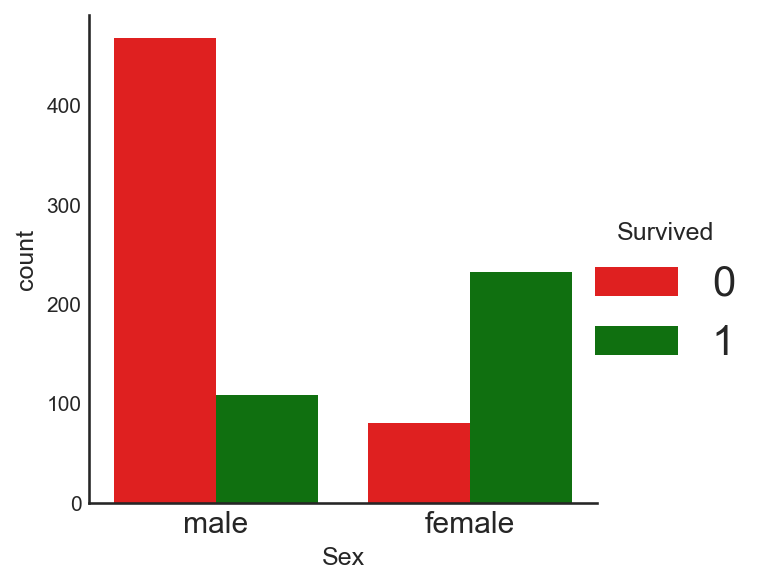

In [73]:
sns.factorplot(x='Sex' , data=train , hue='Survived' , kind='count' , palette=['r','g'])

## Age ->
Let's examine Survival bassed on Age.

**Remember! Age has Null values , so we need to fill it before proceeding further.**

In [74]:
# Age is a continuous variable.. Therefore , let's Analyze the Age variable by plotting Distribution graphs before and after filling Null values

C:\Users\Chinmay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Chinmay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


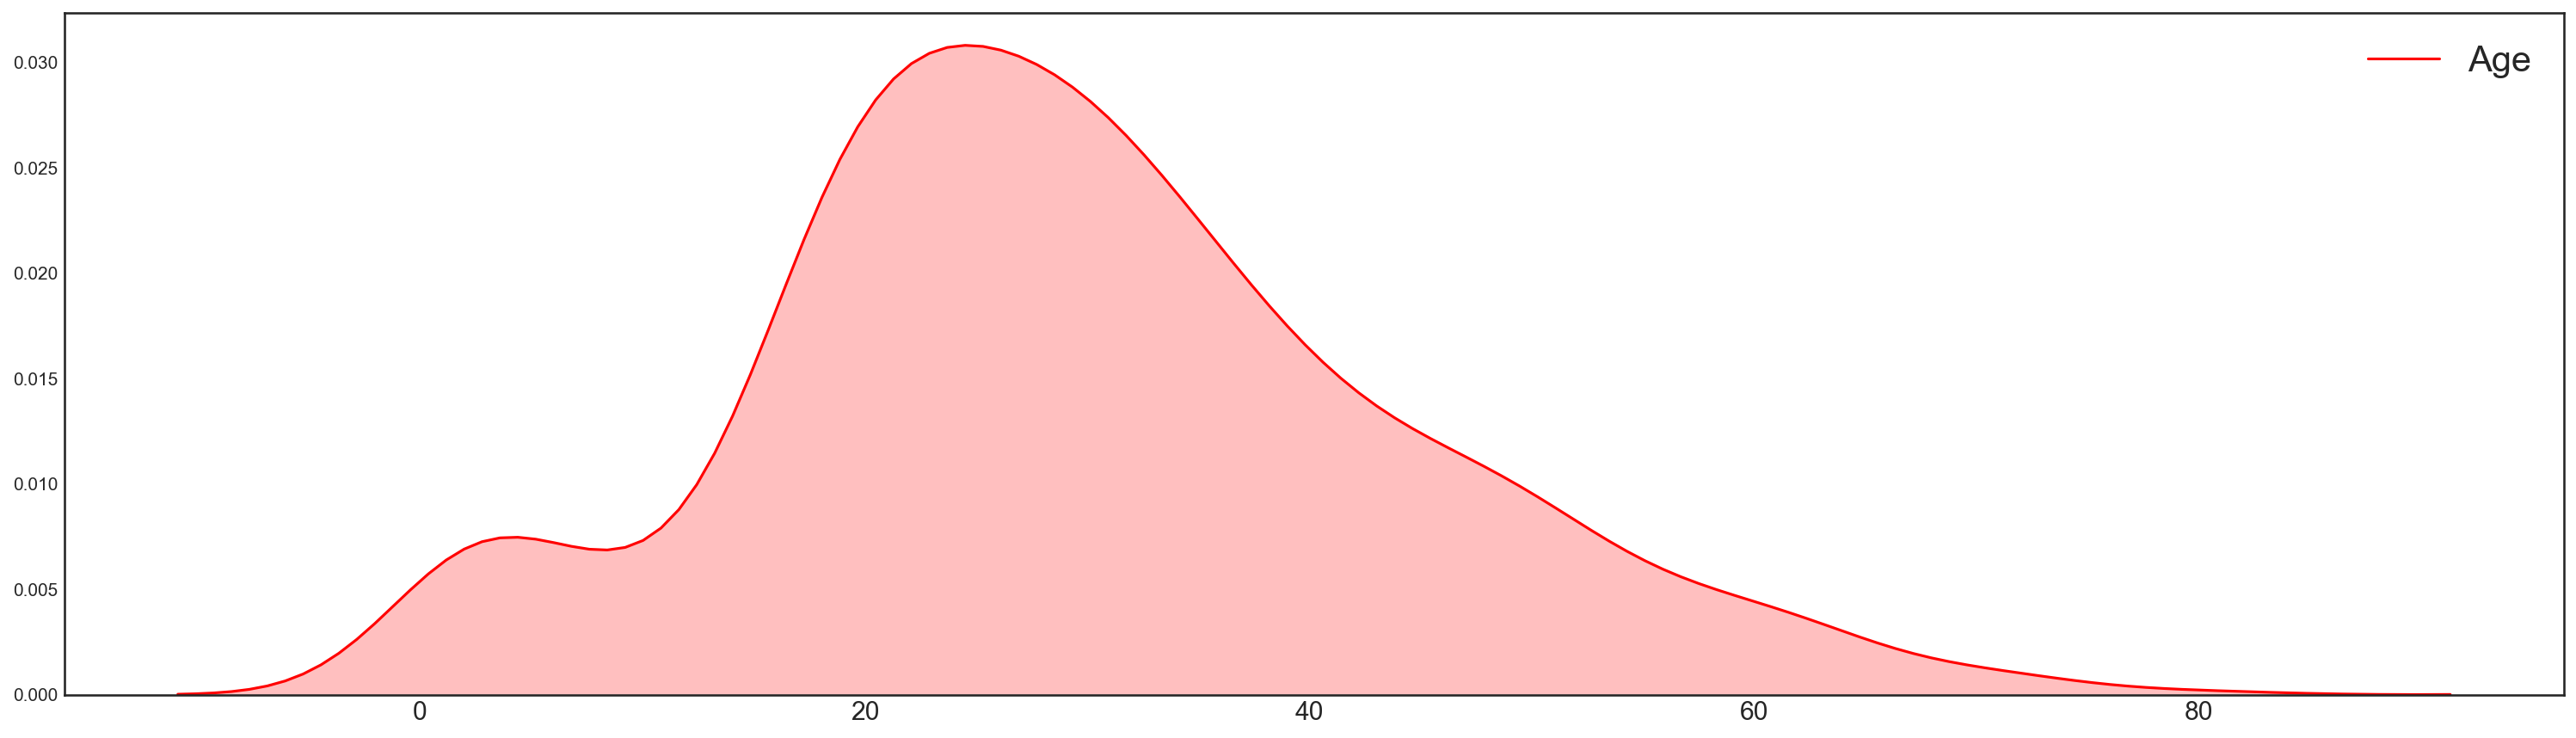

In [75]:
sns.kdeplot(train.Age , shade=True , color='r')

**Fill the Age with it's Median, and that is because, for a dataset with great Outliers, it is advisable to fill the Null values with median.**

In [76]:
print('Median : ' + str(train.Age.median()) + '  Mean : ' + str(train.Age.mean()))

Median : 28.0  Mean : 29.69911764705882


In [77]:
# For this case mean and median are both close, so we can fill with any of these, but I'll go with median.

In [78]:
print(train.Age.count())
# Train
train['Age'].fillna(train.Age.median() , inplace=True)

714


In [79]:
print(train.Age.count())  # Null values filled

891


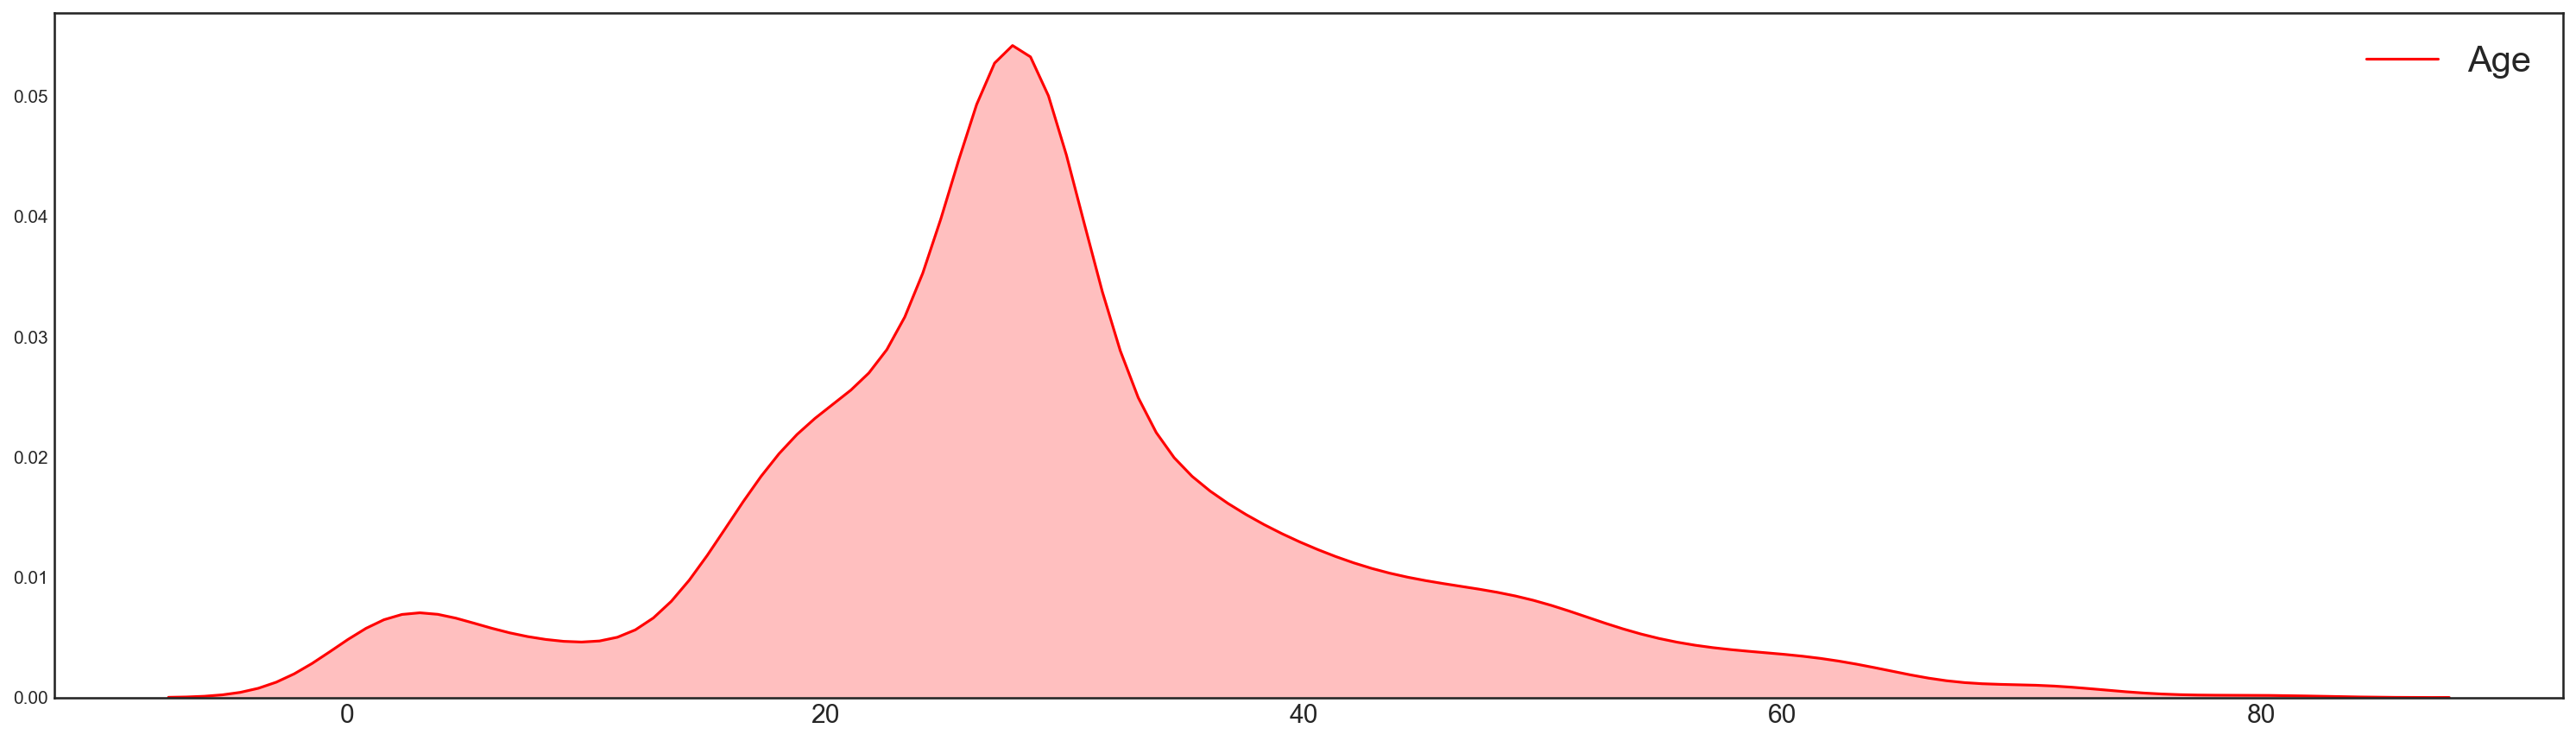

In [80]:
# Now plot kde plot.
sns.kdeplot(train['Age'] , shade=True , color='r')

**We can see that the plot has peak close to 30. So, we can infer that majority of people on Titanic had Age close to 30.**

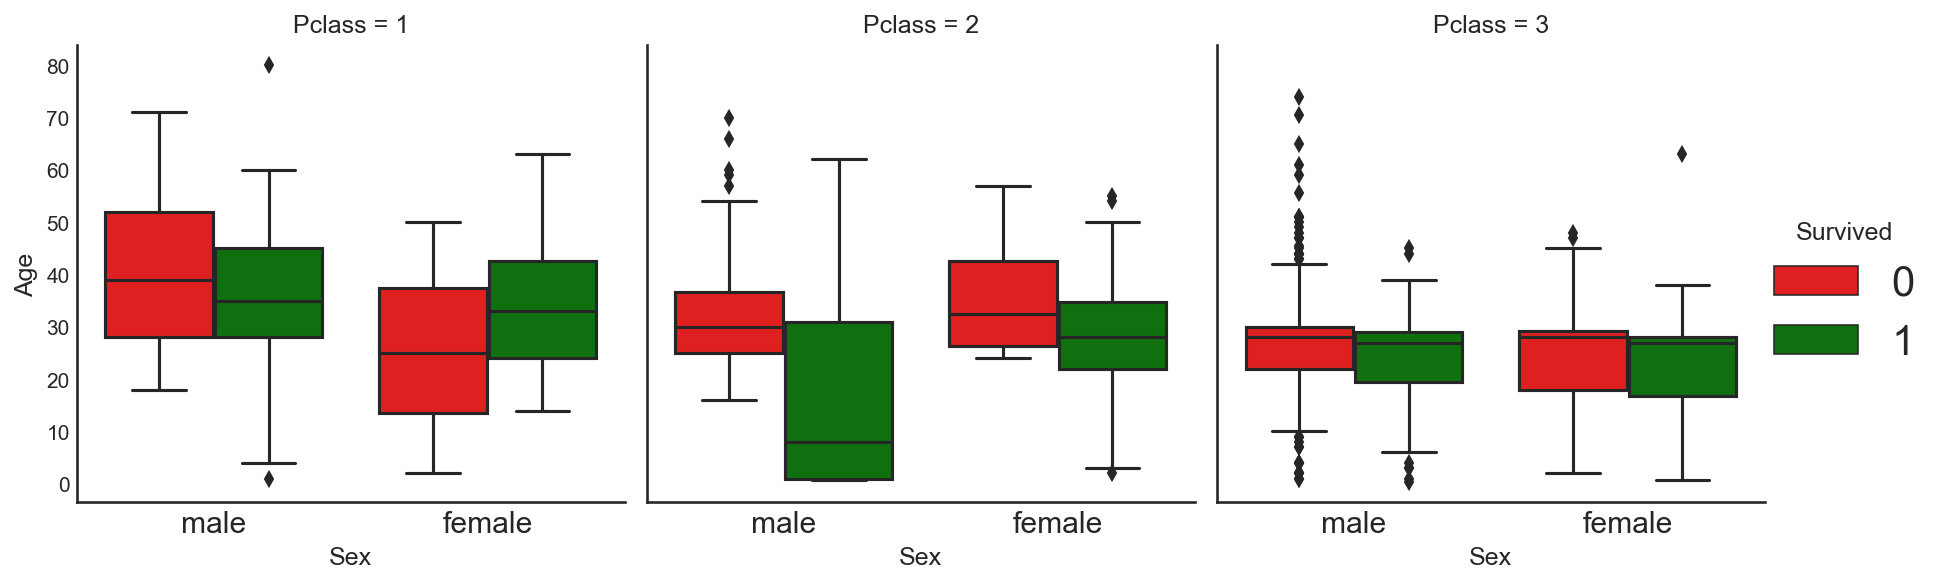

In [81]:
sns.factorplot(x='Sex',y='Age' , col='Pclass', data=train , hue='Survived' , kind = 'box', palette=['r','g'])

In [82]:
# Understanding Box Plot :

# The bottom line indicates the min value of Age.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

## Fare ->
let's examine Survival on the basis of Fare.

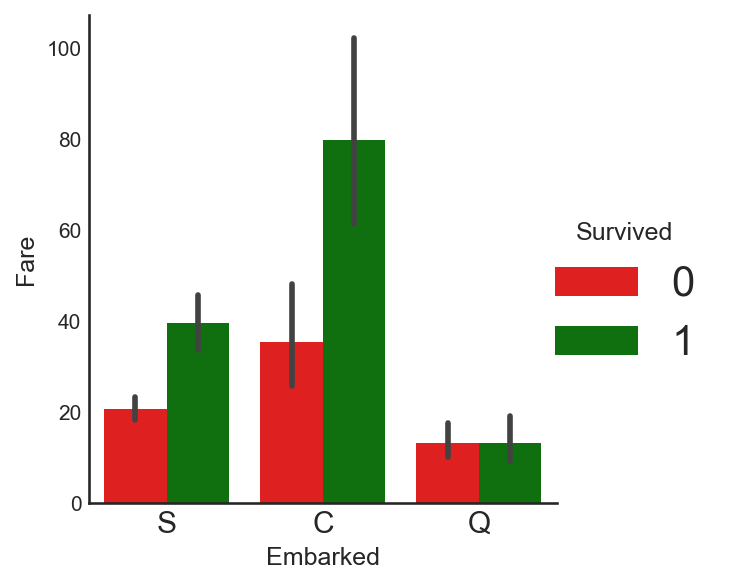

In [83]:
sns.factorplot(x='Embarked' , y ='Fare' , kind='bar', data=train , hue='Survived' , palette=['r','g'])

**We can see that those who paid high were likely to Survive.**

## Embarked ->
Let's examine Survival based on point of embarkation.

**Remember! Embarked has Null values, The best way to fill it would be by most occured value (Mode) .**

In [84]:
print(train.Embarked.count())
# Fill NaN values
train['Embarked'].fillna(train['Embarked'].mode()[0] ,inplace=True)

889


In [85]:
train.Embarked.count() # filled the values with Mode.

891

In [86]:
pd.crosstab([train.Sex,train.Survived] , [train.Pclass,train.Embarked] , margins=True)

Pclass            1           2           3           All
Embarked          C  Q    S   C  Q    S   C   Q    S     
Sex    Survived                                          
female 0          1  0    2   0  0    6   8   9   55   81
       1         42  1   48   7  2   61  15  24   33  233
male   0         25  1   51   8  1   82  33  36  231  468
       1         17  0   28   2  0   15  10   3   34  109
All              85  2  129  17  3  164  66  72  353  891

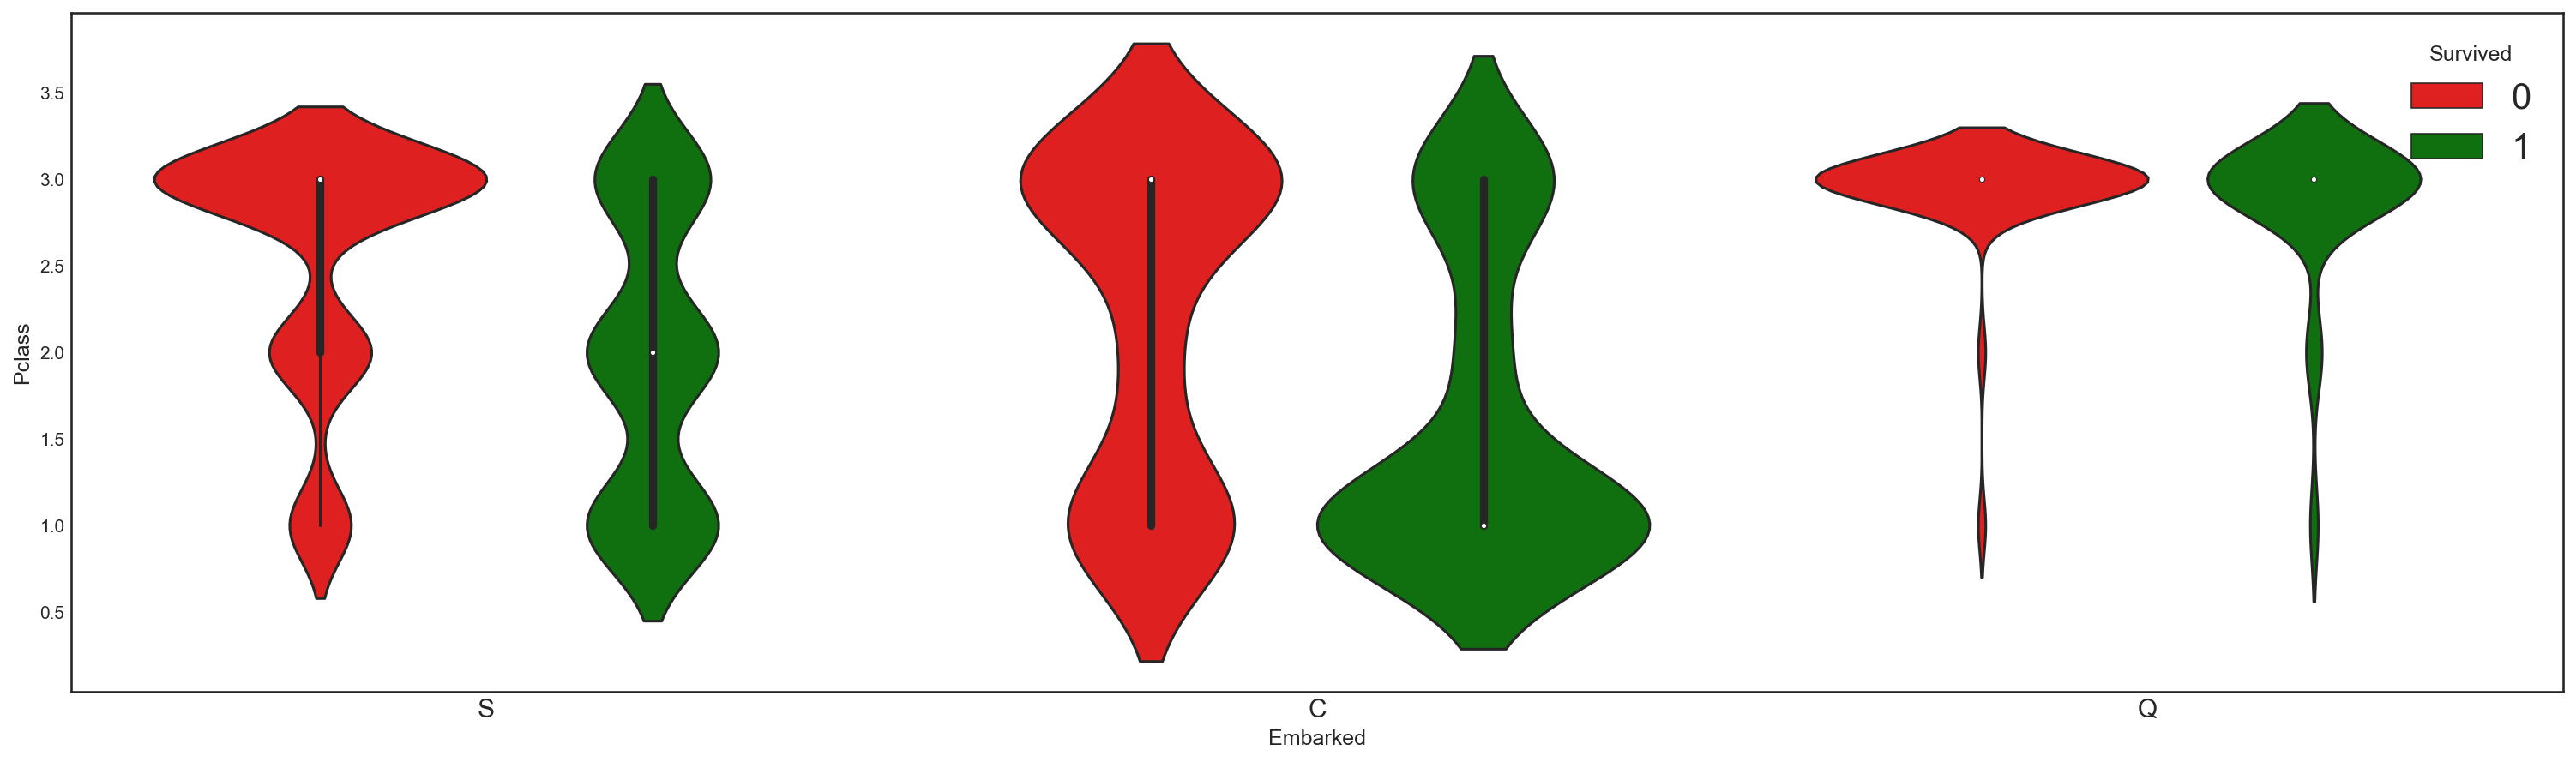

In [87]:
sns.violinplot(x='Embarked' , y='Pclass' , data=train , hue='Survived' , palette=['r','g'])

**We can see that those who embarked at C with First Class ticket had a good chance of Survival.
Whereas for S, it seems that all classes had nearly equal probability of Survival.
And for Q, third Class seems to have Survived and Died with similar probabilities.**

## SibSp ->
Let's Examine Survival on the basis of number of Siblings.

In [88]:
train[['SibSp' , 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


**It seems that there individuals having 1 or 2 siblings/spouses had the highest Probability of Survival, followed by individuals who were Alone.**

In [89]:
# Similarly let's examine Parch

## Parch ->
Examine Survival on basis of number of Parents/Children.

In [90]:
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


**It seems that individuals with  1,2 or 3 family members had a greater Probability of Survival, followed by individuals who were Alone.**

* **Looking at Parch and SibSp, we can see that individuals having Family Members had a slightly greater chance of Survival.**

### We have Explored all the Important features , now let's proceed to Feature Engineering.

# Feature Engineering :

* Let's create a New Attribute __'Alone'__ , which would be True, if he/she is travelling Alone.

In [91]:
# create New Attribute

# Train
train['Alone']=0
train.loc[(train['SibSp']==0) & (train['Parch']==0) , 'Alone'] = 1

# Similarly for test
test['Alone']=0
test.loc[(test['SibSp']==0) & (test['Parch']==0) , 'Alone'] = 1

In [92]:
# Check
train.head()
# test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


* **Cabin contains a lot of Null values, so I'm going to drop it.**
* **Names, PassengerId and Ticket Number doesn't help in finding Probability of Survival, so I'll be Dropping them too.**
* **Also, we have created Alone feature and therefore I'll be Dropping SibSp and Parch too..**

In [93]:
drop_features = ['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' , 'Cabin']
# Train
train.drop(drop_features , axis=1, inplace = True)
# Test
test.drop(drop_features , axis=1 , inplace = True)

In [94]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
Fare        417 non-null float64
Embarked    418 non-null object
Alone       418 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


**We have a few Null values in Test (Age , Fare) , let's fill it up.**

In [96]:
# Fill NaN values in test
test['Age'].fillna(test['Age'].median() , inplace=True)
test['Fare'].fillna(test['Fare'].median() , inplace=True)

# Check
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null object
Alone       418 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


## Convert the Categorical Variables into Numeric

This is Done because Modelling Algos cannot process Categorical String Variables.

* Sex Attribute has (Male/Female) , which will be mapped to 0/1.
* Divide Age into 5 categories and Map them with 0/1/2/3/4.
* Divide Fare into 4 categories and Map them to 0/1/2/3.
* Embarked Attribute has (S/C/Q) , which will be mapped to 0/1/2.
* Alone Attribute is already mapped.
* Pclass Attribute is already mapped.


In [97]:
# Create a function to Map all values

def map_all(frame):
    # Map Sex
    frame['Sex'] = frame.Sex.map({'female': 0 ,  'male': 1}).astype(int)
    
    # Map Embarked
    frame['Embarked'] = frame.Embarked.map({'S' : 0 , 'C': 1 , 'Q':2}).astype(int)
    
    # Map Age
    # Age varies from 0.42 to 80, therefore 5 categories map to range of 16.
    frame.loc[frame.Age <= 16 , 'Age'] = 0
    frame.loc[(frame.Age >16) & (frame.Age<=32) , 'Age'] = 1
    frame.loc[(frame.Age >32) & (frame.Age<=48) , 'Age'] = 2
    frame.loc[(frame.Age >48) & (frame.Age<=64) , 'Age'] = 3
    frame.loc[(frame.Age >64) & (frame.Age<=80) , 'Age'] = 4
    
    # Map Fare
    # Fare varies from 0 to 512 with and we will map it depending upon the quartile variation.
    # Look at train.describe() above, you will see 25% -> 7.91 , 50% -> 14.453 , 75% -> 31
    frame.loc[(frame.Fare <= 7.91) , 'Fare'] = 0
    frame.loc[(frame.Fare > 7.91) & (frame.Fare <= 14.454) , 'Fare'] = 1
    frame.loc[(frame.Fare > 14.454) & (frame.Fare <= 31) , 'Fare'] = 2
    frame.loc[(frame.Fare > 31) , 'Fare'] = 3

In [98]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [99]:
map_all(train)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,1,1.0,0.0,0,0
1,1,1,0,2.0,3.0,1,0
2,1,3,0,1.0,1.0,0,1
3,1,1,0,2.0,3.0,0,0
4,0,3,1,2.0,1.0,0,1


In [100]:
# Similarly for test
map_all(test)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Alone
0,3,1,2.0,0.0,2,1
1,3,0,2.0,0.0,0,0
2,2,1,3.0,1.0,2,1
3,3,1,1.0,1.0,0,1
4,3,0,1.0,1.0,0,0


# Now, Let's Apply Models :

In [101]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train.Survived,test_size=0.20,random_state=66)

In [102]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

accuracy = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    accuracy.append(accuracy_score(pred , y_test))
    
compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : accuracy})
compare

,Algorithm,Accuracy
0,LogisticRegression,0.765363
1,LinearSVM,0.770950
2,rbfSVM,0.798883
3,KNearestNeighbors,0.832402
4,RandomForestClassifier,0.826816
5,DecisionTree,0.849162
6,GradientBoostingClassifier,0.804469
7,GaussianNB,0.754190
8,LinearDiscriminantAnalysis,0.770950
9,QuadraticDiscriminantAnalysis,0.759777


## Well, DecisionTree did a great job there, with the highest accuracy [85%] .

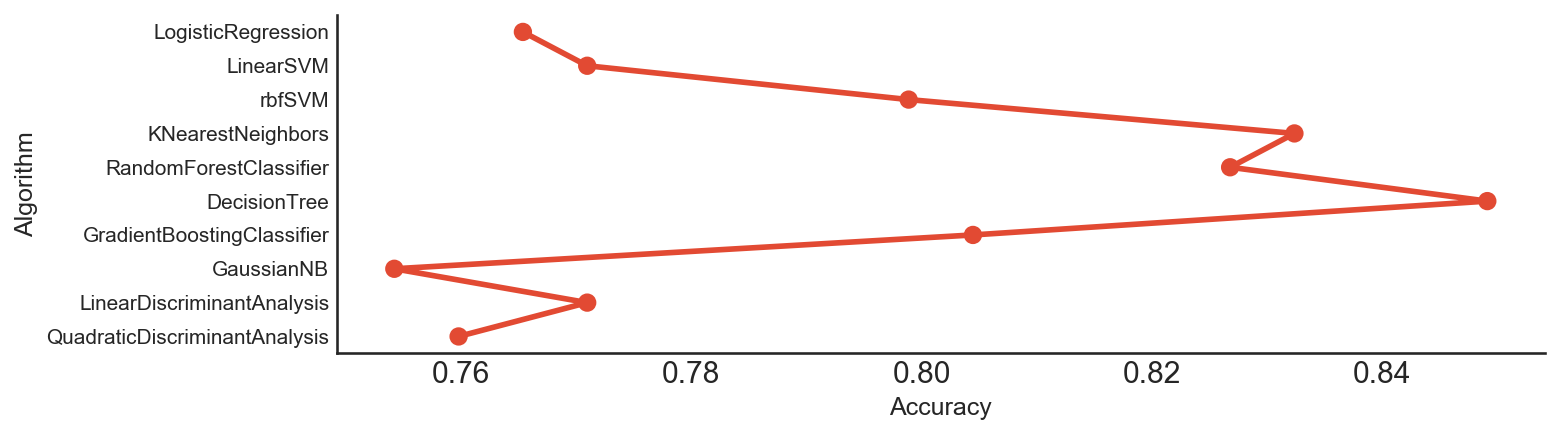

In [108]:
    sns.factorplot(x='Accuracy',y='Algorithm' , data=compare , kind='point' , size=3 , aspect = 3.5)

## Let's try to tune Parameters :

In [116]:
params_dict={'criterion':['gini','entropy'],'max_depth':[5.21,5.22,5.23,5.24,5.25,5.26,5.27,5.28,5.29,5.3]}
clf_dt=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params_dict,scoring='accuracy', cv=5)
clf_dt.fit(x_train,y_train)
pred=clf_dt.predict(x_test)
print(accuracy_score(pred,y_test))
print(clf_dt.best_params_)

0.8379888268156425
{'criterion': 'gini', 'max_depth': 5.21}


In [118]:
#now lets try KNN.
#lets try to tune n_neighbors. the default value is 5. so let us vary from say 1 to 50.
no_of_test=[i+1 for i in range(50)]
#no_of_test
params_dict={'n_neighbors':no_of_test}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))
print(clf_knn.best_params_)

0.8268156424581006
{'n_neighbors': 7}


## Generate CSV file based on DecisionTree Classifier.

In [120]:
pred = clf_dt.predict(test)

d = {'PassengerId' : test_df.PassengerId , 'Survived' : pred}
answer = pd.DataFrame(d)
answer.to_csv('Prediction.csv' , index=False)



# THANK YOU :)